In [11]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/amongnikol/belajaraDataScienceJCOp/refs/heads/main/course3-regresi%26klasifikasiLanjutan/data/iris.csv', index_col='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# visualize data

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\akmal\anaconda3\envs\jcopml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\akmal\anaconda3\envs\jcopml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

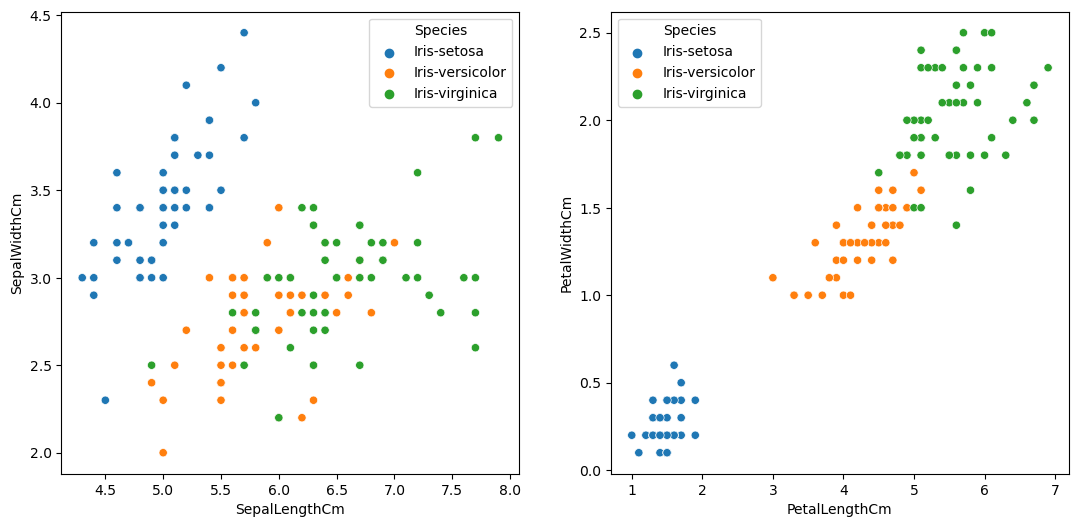

In [15]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
sns.scatterplot('SepalLengthCm', 'SepalWidthCm', 'Species', data=df)
plt.subplot(122)
sns.scatterplot('PetalLengthCm', 'PetalWidthCm', 'Species', data=df)

# dataset splitting

In [16]:
x = df.drop(columns='Species')
y = df.Species

# stratify untuk membagi target ke test dan training seimbang# training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [17]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
9,4.4,2.9,1.4,0.2
107,4.9,2.5,4.5,1.7
77,6.8,2.8,4.8,1.4
10,4.9,3.1,1.5,0.1
90,5.5,2.5,4.0,1.3


# training

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp
from jcopml.tuning.space import Integer, Real

# one vs rest/ one vs all

In [24]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), x_train.columns)
   
])

# optimizernya tidak pakai gradient descent biasa melainkan menggunakan lbfgs
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(multi_class='ovr', solver='lbfgs', n_jobs=-1, random_state=42))
])

# cv = cross validation
model = GridSearchCV(pipeline, gsp.logreg_params, cv=3, n_jobs=-1, verbose=1)
model.fit(x_train, y_train)

print(model.best_params_)
print(model.score(x_train, y_train), model.best_score_, model.score(x_test, y_test))

Fitting 3 folds for each of 14 candidates, totalling 42 fits
{'algo__C': 1000.0, 'algo__fit_intercept': False}
0.9583333333333334 0.9500000000000001 0.9666666666666667


# multinomial

In [25]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), x_train.columns)
   
])

# optimizernya tidak pakai gradient descent biasa melainkan menggunakan lbfgs
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(multi_class='multinomial', solver='lbfgs', n_jobs=-1, random_state=42))
])

# cv = cross validation
model = GridSearchCV(pipeline, gsp.logreg_params, cv=3, n_jobs=-1, verbose=1)
model.fit(x_train, y_train)

print(model.best_params_)
print(model.score(x_train, y_train), model.best_score_, model.score(x_test, y_test))

Fitting 3 folds for each of 14 candidates, totalling 42 fits
{'algo__C': 10.0, 'algo__fit_intercept': True}
0.9833333333333333 0.9666666666666667 1.0
